In [3]:
import numpy as np
import pandas as pd
import copy
import collections
from scipy import linalg
import math
from collections import defaultdict
import matplotlib.pyplot as plt

# df_bookratings is the dataframe for the book ratings

In [14]:
df_bookratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding='latin-1')
df_bookratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# df_books is the dataframe for books

In [15]:
df_bookstemp = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding='latin-1')
df_books = df_bookstemp[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packa

In [16]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


In [17]:
booklist = df_books['Book-Title'].tolist()
booklist

['Classical Mythology',
 'Clara Callan',
 'Decision in Normandy',
 'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It',
 'The Mummies of Urumchi',
 "The Kitchen God's Wife",
 "What If?: The World's Foremost Military Historians Imagine What Might Have Been",
 'PLEADING GUILTY',
 'Under the Black Flag: The Romance and the Reality of Life Among the Pirates',
 "Where You'll Find Me: And Other Stories",
 'Nights Below Station Street',
 "Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust",
 'The Middle Stories',
 'Jane Doe',
 "A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series)",
 'The Witchfinder (Amos Walker Mystery Series)',
 'More Cunning Than Man: A Social History of Rats and Man',
 'Goodbye to the Buttermilk Sky',
 'The Testament',
 'Beloved (Plume Contemporary Fiction)',
 "Our Dumb Century: The Onion Presents 100 Years of Headlines from America's Finest News Source",
 'New Vegetarian: Bo

In [18]:
nbooks = len(booklist)
nbooks

271360

In [19]:
nusers = len(df_bookratings['User-ID'].drop_duplicates().tolist())  
nusers

105283

In [20]:
dfout = pd.DataFrame(columns=['user']+booklist)
dfout

,user,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,The Mummies of Urumchi,The Kitchen God's Wife,What If?: The World's Foremost Military Historians Imagine What Might Have Been,PLEADING GUILTY,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,...,"Burpee Gardening Cyclopedia: A Concise, Up to Date Reference for Gardeners at All Levels",Tropical Rainforests: 230 Species in Full Color (Golden Guide),Cocktail Classics,Anti Death League,Flashpoints: Promise and Peril in a New World,There's a Bat in Bunk Five,From One to One Hundred,Lily Dale : The True Story of the Town that Talks to the Dead,Republic (World's Classics),A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin


In [21]:
print(df_bookratings.shape)

(1149780, 3)


In [22]:
df_bookratings.columns = ['UserID', 'ISBN', 'BookRating']

# Showing that yhe ratings are very unevenly distributed, and the vast majority of ratings are 0.

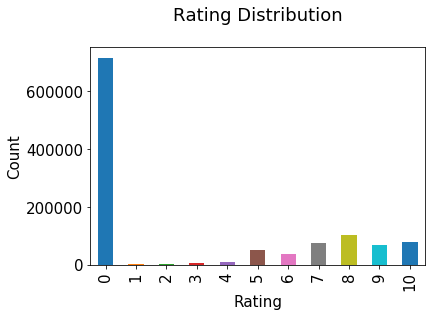

In [23]:
plt.rc("font", size=15)
df_bookratings.BookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [24]:
print(df_books.shape)
print(list(df_books.columns))

(271360, 5)
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']


In [25]:
df_books.columns = ['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher']

In [26]:
df_users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')

In [27]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [28]:
df_users.columns = ['UserID', 'Location', 'Age']

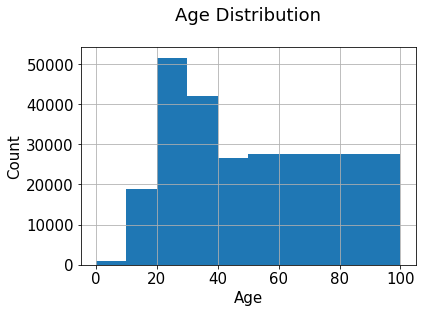

In [29]:
df_users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

# Number of Rating Counts

In [30]:
df_rating_count = pd.DataFrame(df_bookratings.groupby('ISBN')['BookRating'].count())
df_rating_count.sort_values('BookRating', ascending=False).head()

,BookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


# Top 5 most rated books

In [31]:
df_most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
df_most_rated_books_summary = pd.merge(df_most_rated_books, df_books, on='ISBN')
df_most_rated_books_summary

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA


# Merging the books ratings dataset and the books dataset so the ISBN numbers can match their book

In [32]:
df_combine_ISBN_and_books_temp = pd.DataFrame(df_bookratings['ISBN'].tolist(), columns = ['ISBN'])
df_combine_ISBN_and_books = pd.merge(df_combine_ISBN_and_books_temp, df_books, on='ISBN')

In [33]:
df_combine_ISBN_and_books.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


# Removing Duplicates

In [34]:
df_no_duplicates = df_combine_ISBN_and_books.drop_duplicates()

In [35]:
df_no_duplicates.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
60,0155061224,Rites of Passage,Judith Rae,2001,Heinle
62,0446520802,The Notebook,Nicholas Sparks,1996,Warner Books
178,052165615X,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
179,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press


# Average Rating of each book

In [36]:
df_average_rating = pd.DataFrame(df_bookratings.groupby('ISBN')['BookRating'].mean())
df_average_rating['ratingCount'] = pd.DataFrame(df_bookratings.groupby('ISBN')['BookRating'].count())
df_average_rating.sort_values('ratingCount', ascending=False).head()

,BookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


# To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [37]:
counts1 = df_bookratings['UserID'].value_counts()
df_bookratings = df_bookratings[df_bookratings['UserID'].isin(counts1[counts1 >= 200].index)]
counts = df_bookratings['BookRating'].value_counts()
df_bookratings = df_bookratings[df_bookratings['BookRating'].isin(counts[counts >= 100].index)]

#  Convert the books ratings table to a 2D utility matrix.

In [38]:
ratings_pivot = df_bookratings.pivot(values='BookRating', index='UserID', columns='ISBN').fillna(0)
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
UserID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
type(ratings_pivot)

pandas.core.frame.DataFrame

In [40]:
ratings_pivot.columns

Index([' 0330299891', ' 0375404120', ' 0586045007', ' 9022906116',
       ' 9032803328', ' 9044922564', ' 9044922572', ' 9044922718',
       ' 9044923161', ' 904492401X',
       ...
       'UNGRANDHOMMED', 'X000000000', 'YOUTELLEM,AND', 'ZR903CX0003',
       '\0432534220\""', '\2842053052\""', 'b00005wz75', 'cn108465',
       'cn113107', 'Ô½crosoft'],
      dtype='object', name='ISBN', length=207699)

In [41]:
df_bookratings.columns

Index(['UserID', 'ISBN', 'BookRating'], dtype='object')

In [42]:
type(df_bookratings)

pandas.core.frame.DataFrame

# Let's see books are correlated with the 2nd most rated book "The Lovely Bones: A Novel".

In [44]:
bones_ratings = ratings_pivot['0316666343']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(df_average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,1295
0446672211,0.214342,585
0385265700,0.198256,319
0316601950,0.173103,568
0316096199,0.172706,301
0375726403,0.169695,321
0743418174,0.164598,470
0375706771,0.161648,380
0316284955,0.156799,356


# Finding the Titles of the Books

In [45]:
books_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'], 
                                  index=np.arange(9), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, df_books, on='ISBN')
corr_books

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial
7,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA
8,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner


# "The Nanny Diaries: A Novel", "The Pilot's Wife : A Novel", and "1st to Die: A Novel" are all correlated with "The Lovely Bones: A Novel"

# Next we will look into Collaborative Filtering Using k-Nearest Neighbors (kNN)

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user. We then find the k item that has the most similar user engagement vectors.

# Starting from the original data set, we will be only looking at the popular books.  

In [46]:
combine_book_rating = pd.merge(df_bookratings, df_books, on='ISBN')
columns = ['YearOfPublication', 'Publisher', 'BookAuthor']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,UserID,ISBN,BookRating,BookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


# Group by book titles and create a new column for total rating count.

In [47]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['BookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['BookTitle'])['BookRating'].
     count().
     reset_index().
     rename(columns = {'BookRating': 'totalRatingCount'})
     [['BookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,BookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [48]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'BookTitle', right_on = 'BookTitle', how = 'left')
rating_with_totalRatingCount.head()

,UserID,ISBN,BookRating,BookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [49]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [50]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


# About 1% of the books received 31 or more ratings. Because we have so many books in our data, we will limit it to the top 1%.

In [51]:
popularity_threshold = 31
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,UserID,ISBN,BookRating,BookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


# In order to improve computing speed, our user data will be limited to users in the US and Canada.

# Combining user data with the rating data and total rating count data.

In [52]:
combined = rating_popular_book.merge(df_users, left_on = 'UserID', right_on = 'UserID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,UserID,ISBN,BookRating,BookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


In [53]:
from scipy.sparse import csr_matrix

us_canada_user_rating = us_canada_user_rating.drop_duplicates(['UserID', 'BookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'BookTitle', columns = 'UserID', values = 'BookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

# Test our model and make some recommendations:

In [54]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Born in Shame:

1: Born in Fire, with distance of 0.36532326141430826:
2: Irish Hearts, with distance of 0.46735985014694525:
3: Born in Ice, with distance of 0.5005526975686632:
4: Stanislaski Brothers (Silhouette Promo), with distance of 0.5047799387219949:
5: Considering Kate (The Stanislaskis) (Silhouette Special Edition), with distance of 0.5092727683085672:


# Collaborative Filtering Using Matrix Factorization: Singular Value Decomposition (SVD)

In [55]:
us_canada_user_rating_pivot2 = us_canada_user_rating.pivot(index = 'UserID', columns = 'BookTitle', values = 'BookRating').fillna(0)
us_canada_user_rating_pivot2.head()

BookTitle,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,3rd Degree,4 Blondes,...,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",World of Pies : A Novel,Writ of Execution,Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
UserID,,,,,,,,,,,,,,,,,,,,,
254,0.000,0.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2766,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2977,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000
3363,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [56]:
us_canada_user_rating_pivot2.shape

(734, 1656)

In [57]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(1656, 734)

# We transposed the matrix so that the bookTitles become rows and user IDs become columns. After using TruncatedSVD to decompose it, we fit it into the model for dimensionality reduction.

In [58]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(1656, 12)

In [59]:
matrix

array([[ 1.65951821,  0.45074264,  0.31375117, ..., -1.43663894,
         0.50887922,  1.70894284],
       [ 4.50253204, -5.95293236, -3.84693349, ..., -0.82200095,
         1.90476978, -0.15038152],
       [11.77529506,  8.69837429,  2.43612285, ..., -3.24905845,
        -8.01300853, -1.11600474],
       ...,
       [ 5.84827604, -0.76843416, -1.92817907, ..., -0.64930554,
         2.19871106,  1.53090694],
       [ 4.89487441, -2.84483697, -0.3110594 , ...,  0.23519916,
        -0.93998631,  1.66521603],
       [ 9.05549251, -2.6354935 ,  3.15779272, ..., -3.88729468,
         4.74760589, -1.8074357 ]])

# We calculate the Pearson’s R correlation coefficient for every book pair in our final matrix. To compare this with the results from kNN, we pick the same book “Born in Shame” to find the books that have high correlation coefficients (between 0.9 and 1.0) with it.

In [60]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(1656, 1656)

In [66]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
Born_in_Shame = us_canada_book_list.index("Born in Shame")
print(Born_in_Shame)

198


In [67]:
corr_Born_in_Shame  = corr[Born_in_Shame]
list(us_canada_book_title[(corr_Born_in_Shame<1.0) & (corr_Born_in_Shame>0.9)])

['Born in Fire',
 'Born in Ice',
 'Considering Kate (The Stanislaskis) (Silhouette Special Edition)',
 "Cordina's Crown Jewel",
 'Heart of the Sea (Irish Trilogy)',
 'Hidden Riches',
 'Irish Hearts',
 'Irish Rebel (Special Edition, 1328)',
 'Jewels of the Sun (Irish Trilogy)',
 'Macgregor Grooms (Macgregors)',
 'Night Shield (Intimate Moments, 1027)',
 'November of the Heart',
 'Now You See Her',
 'Petals on the River (Avon Historical Romance)',
 'Reflections And Dreams',
 'Sacred Sins',
 'Stanislaski Brothers (Silhouette Promo)',
 'Summer Pleasures',
 'Table For Two',
 'Tears of the Moon (Irish Trilogy)',
 'Truly, Madly Manhattan']

In [68]:
print(df_users.shape)

(278858, 3)
